In [1]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random

In [2]:
# Read and preprocess data
data = pd.read_csv("result_un.csv")
data.columns = ['h', 'p', 'r']
data = data.sort_values('p', ascending=False).reset_index(drop=True)

## Task 1.1

In [3]:
# Get the top 50 hashtags
data_1 = data.drop(columns=['r'])
top50 = data_1.head(50)

In [6]:
# data_1.to_csv('hashtags.csv')

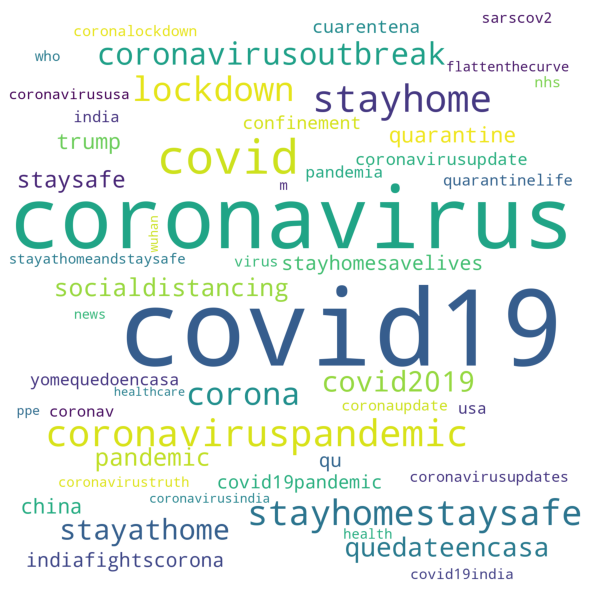

In [4]:
# Plot the WordCloud image 
h_p_dict = {}
for i in range(50):
    h_p_dict[top50['h'][i]] = float(top50['p'][i])

wordcloud = WordCloud(width=1600, height=1600, 
                      relative_scaling='auto', background_color='white',
                      normalize_plurals=False).generate_from_frequencies(h_p_dict)

plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.savefig('./word_cloud.png')
plt.show()

## Task 1.2

In [5]:
# Get the degrees
data['d'] = np.array([len(i.split()) for i in data['r']])
data.head()

,h,p,r,d
0,covid19,9304520.0,igcomicfamily amazinghumans coronaapocolypse...,1325894
1,coronavirus,5689428.0,scitalk2020 blackjournalistsmatter amazinghu...,860334
2,covid,575216.0,maxellad juniorsambia tolaksegalaaksimassa i...,194527
3,stayhome,335322.0,tolaksegalaaksimassa igcomicfamily linelive ...,171248
4,coronaviruspandemic,335305.0,seminoles coronaapocolypse prostest waronvir...,93537


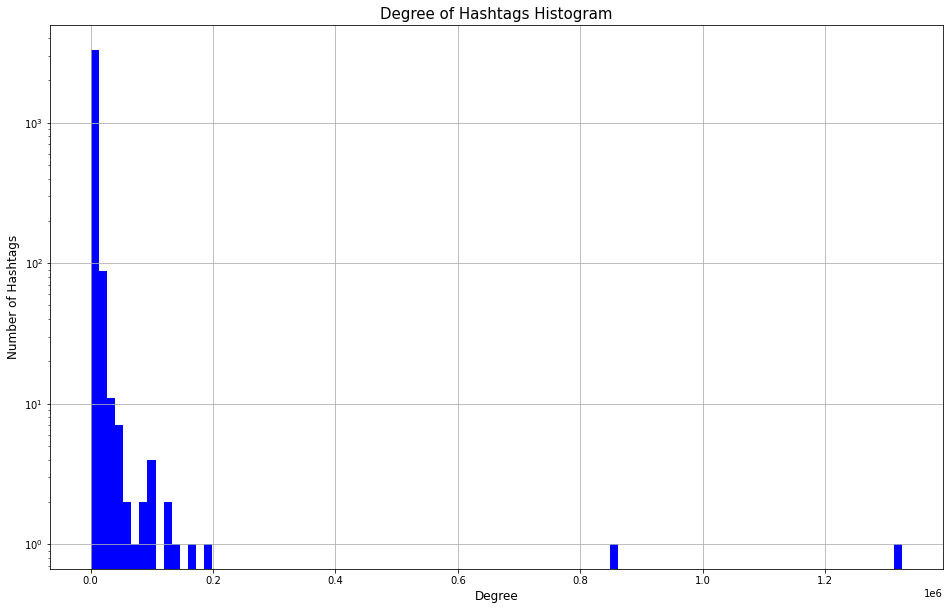

In [6]:
# Plot the histogram
fig = plt.figure(figsize=(16, 10))
plt.axes(yscale = "log")
plt.hist(data['d'], bins=100, rwidth=1, color='b')
plt.title('Degree of Hashtags Histogram', fontsize=15)
plt.xlabel('Degree', fontsize=12)
plt.ylabel('Number of Hashtags', fontsize=12)
plt.savefig("histogram_graph.png")
plt.grid()
plt.show()